Importing dependencies

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data collection and Analysis

In [19]:
costumer_df = pd.read_csv('Mall_Customers.csv')
print(costumer_df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [20]:
print(costumer_df.shape)

(200, 5)


In [21]:
print(costumer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Checking for missing values

In [22]:
costumer_df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Extracting features and variables

In [23]:
X = costumer_df.iloc[:, [3,4]].values
print(type(X))


<class 'numpy.ndarray'>


Choosing number of clusters using  WCSS (With Clusters Sum of Squares)

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=123)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

/home/tasha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tasha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tasha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tasha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tasha/.local/lib/python3.8/site-pa

Determining how many clusters will be best by visualizing

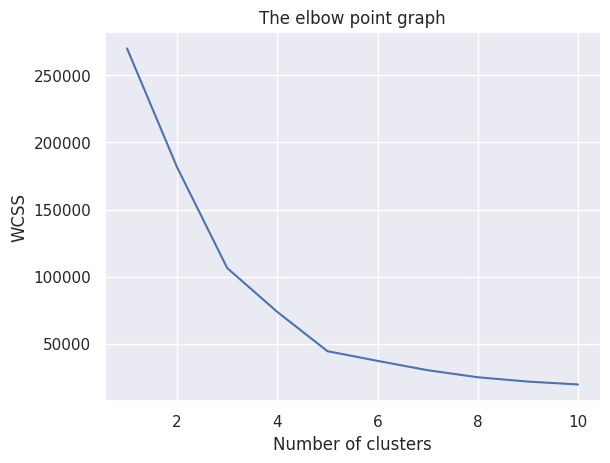

In [25]:
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('The elbow point graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The graph has 2 elbow points (3, 5). But the optimum is 5 because after that point there is no significant drop in the WCSS value

Training a K-Means Clustering Model (An example of an Unsupervised model)

In [26]:
kmeans = KMeans(n_clusters=5, random_state=34)

#returning label for each data point based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 4 3 1 3 4 3 4 3 1 3 4 3 4 3 4 3 4 3 1 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]


/home/tasha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualizing all the clusters

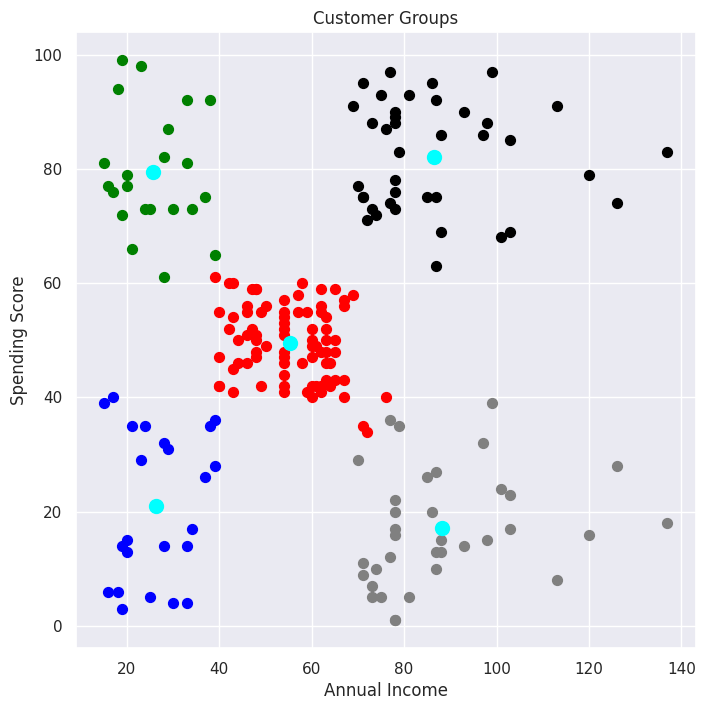

In [27]:
plt.figure(figsize=(8, 8))
plt.scatter(X[Y==0,0],X[Y==0,1], s=50, c='green',  label='cluster1')
plt.scatter(X[Y==1,0],X[Y==1,1], s=50, c='red',  label='cluster2')
plt.scatter(X[Y==2,0],X[Y==2,1], s=50, c='blue',  label='cluster3')
plt.scatter(X[Y==3,0],X[Y==3,1], s=50, c='black',  label='cluster4')
plt.scatter(X[Y==4,0],X[Y==4,1], s=50, c='gray',  label='cluster5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()